Assignment - 4
a)

The best accuracy I got with the spam dataset is 94% ; Optimum numEpochs = 50000 and Learning rate = 0.0008

In [14]:
from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [15]:
def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)

def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass

    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = import_data()

loading training data
loading test data


In [16]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(953, 2955) (953, 2) (105, 2955) (105, 2)


In [17]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]
numEpochs = 50000
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [18]:
X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [19]:
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))
bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

In [20]:
init_OP = tf.initialize_all_variables()

# PREDICTION ALGORITHM i.e. FEEDFORWARD ALGORITHM
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [21]:
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [22]:
epoch_values=[]
accuracy_values=[]
cost_values=[]
errors = []

In [23]:
sess = tf.Session()
sess.run(init_OP)
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))


# Training epochs
for i in range(numEpochs):
    sess.run([training_OP], feed_dict={X: trainX, yGold: trainY})
    print(sess.run([cost_OP], feed_dict={X: trainX, yGold: trainY}))
    accuracy_value = sess.run(accuracy_OP, feed_dict={X: testX, yGold: testY})
    errors.append(1-accuracy_value)
    print (errors[-1])

[254.91869]
0.561904758215
[253.66425]
0.561904758215
[252.4976]
0.561904758215
[251.41431]
0.552380949259
[250.41]
0.561904758215
[249.4803]
0.561904758215
[248.62079]
0.552380949259
[247.82706]
0.552380949259
[247.09497]
0.552380949259
[246.42041]
0.542857140303
[245.79938]
0.542857140303
[245.2282]
0.533333331347
[244.70319]
0.542857140303
[244.22086]
0.542857140303
[243.77803]
0.542857140303
[243.37184]
0.542857140303
[242.99927]
0.542857140303
[242.65767]
0.542857140303
[242.34457]
0.542857140303
[242.05763]
0.542857140303
[241.79482]
0.542857140303
[241.55403]
0.542857140303
[241.33351]
0.552380949259
[241.1315]
0.552380949259
[240.94638]
0.552380949259
[240.77686]
0.552380949259
[240.62155]
0.552380949259
[240.47926]
0.561904758215
[240.34875]
0.561904758215
[240.22906]
0.561904758215
[240.11931]
0.561904758215
[240.01854]
0.552380949259
[239.9261]
0.552380949259
[239.84108]
0.552380949259
[239.76305]
0.552380949259
[239.69122]
0.552380949259
[239.62498]
0.542857140303
[239.5640

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


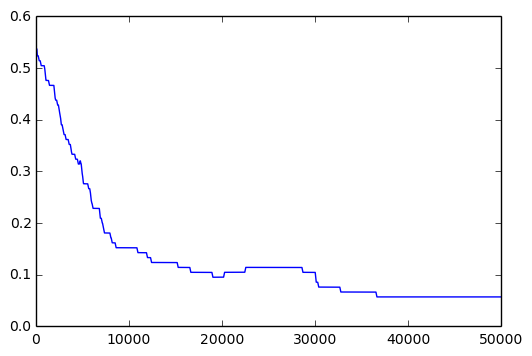

In [24]:
plt.plot([np.mean(errors[i-100:i]) for i in range(len(errors))])
plt.show() 